In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from scipy.spatial.distance import cosine

from utils import morisita_child_adult, per_session_plot
from dataset import get_manchester

def cosine_child_adult(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(fill_value=0))
    return 1 - cosine(a.fillna(0), b.fillna(0))

def spearman_child_adult(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    result = spearmanr(a, b)
    return result.correlation

def pearson_child_adult(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    result = pearsonr(a, b)
    return result[0]

In [4]:
unigrams, bigrams, trigrams = get_manchester(
    "/home/paul/corpora/Manchester/**/*", 
    cached=True, 
    gram_sizes=[1,2,3])

# Comparing Morisita, Cosine, Pearson and Spearman

morisita, cosine and pearson track each other on unigrams and bigrams, but pearson falls off on trigrams.

implementations used:

- [cosine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html)
- [spearman](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html)
- [pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/_distn_infrastru

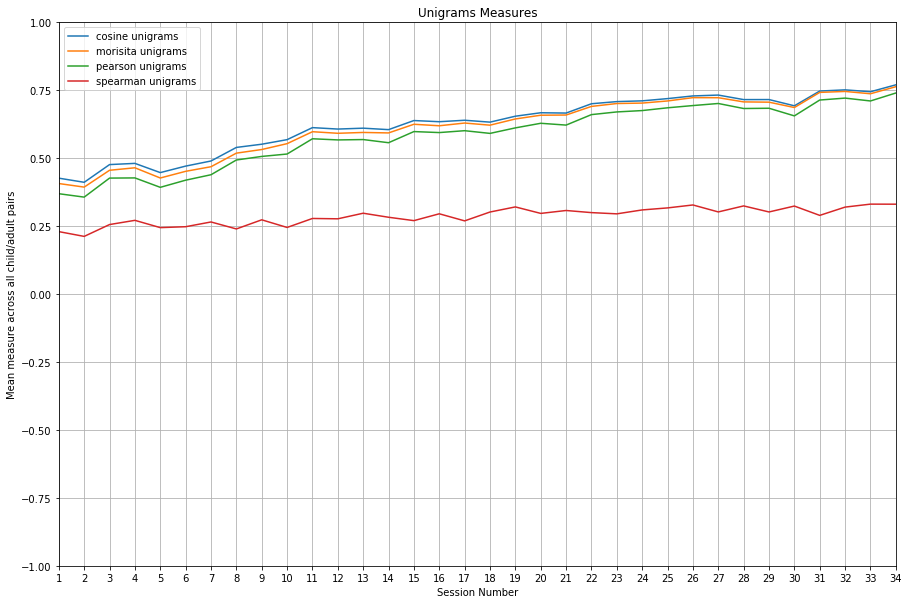

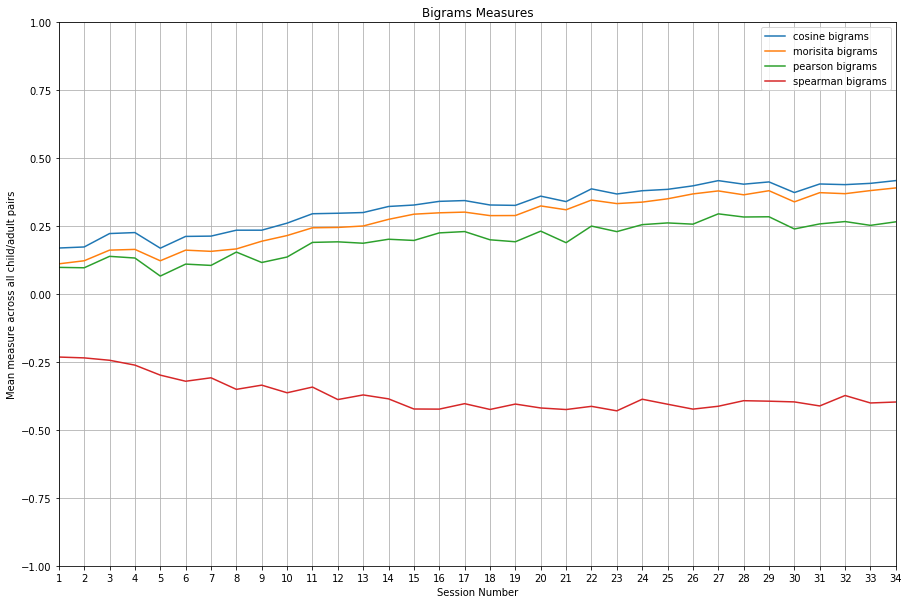

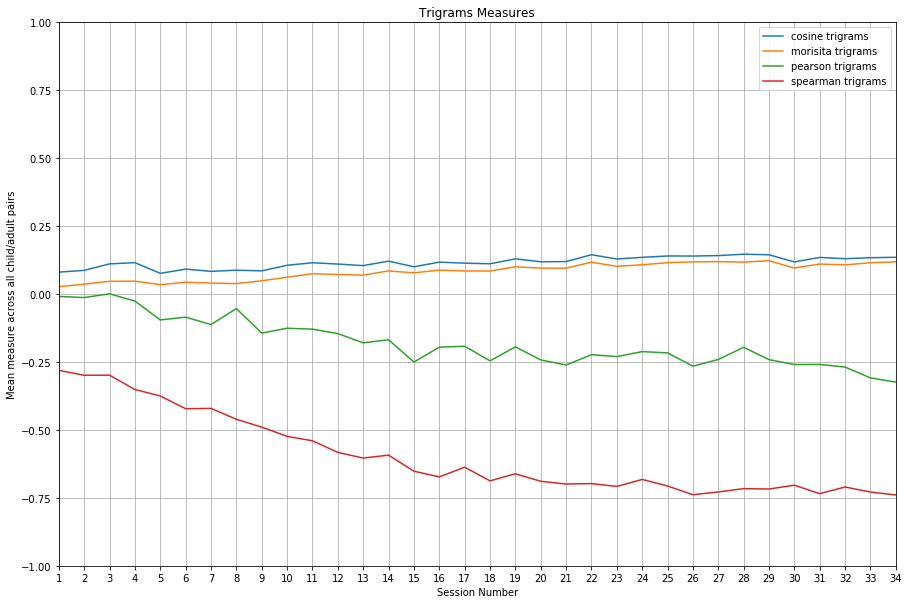

In [72]:
for df, label, style in zip((unigrams, bigrams, trigrams), 
                     ('unigrams', 'bigrams', 'trigrams'),
                     ('-', '--', '-^')):
    plt.ylim(-1, 1)
    for correlation, corr_name in zip((cosine_child_adult, morisita_child_adult,
                                      pearson_child_adult, spearman_child_adult),
                                     'cosine morisita pearson spearman'.split()):
        (
            df
            .groupby(['corpus', 'session'])
            .apply(correlation)
            .groupby(level='session')
            .mean()
            .plot(label='{} {}'.format(corr_name, label))
        )

    per_session_plot('{} Measures'.format(label.capitalize()), 
                     ylabel='Mean measure across all child/adult pairs')

# Session 1

In [ ]:
child = df.speaker.eq('CHI')
adult = df.speaker.eq('MOT')
a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)

In [24]:
def ngram_vecs(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    return pd.DataFrame({'child': a, 'adult': b})

# Scatterplots of bigram data for all children in session 1

In [90]:
plt.rcParams['figure.figsize'] = 5,5

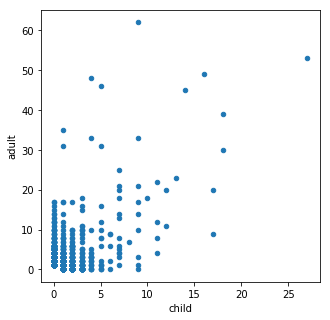

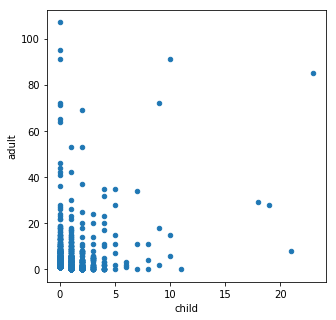

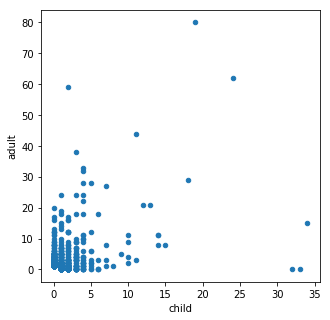

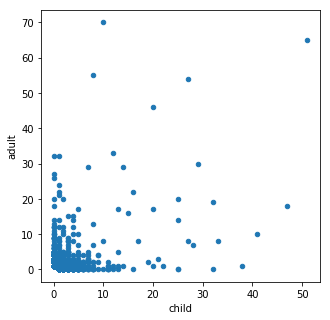

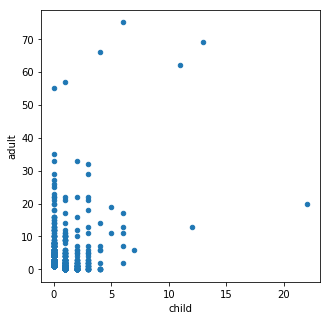

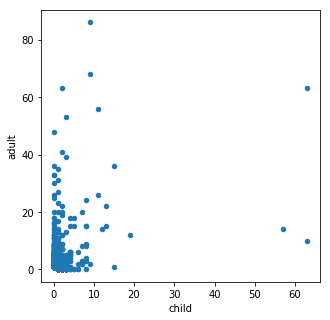

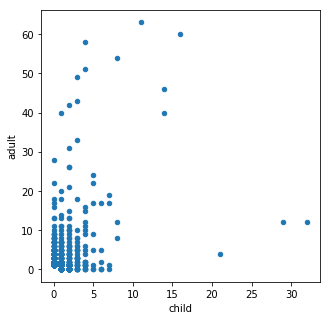

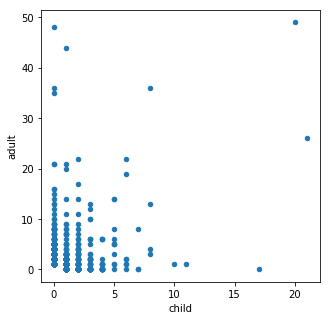

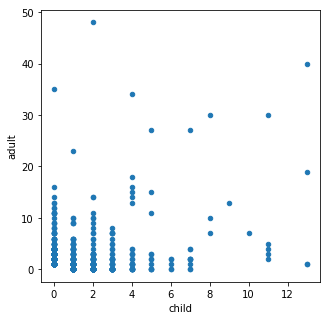

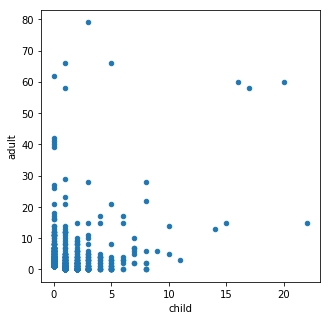

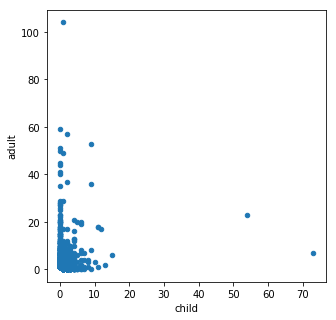

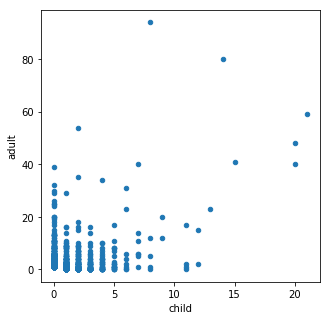

In [89]:
x = (
    bigrams
    [bigrams.session.eq(1)]
    .groupby(['corpus'])
    .apply(ngram_vecs)
)
axes = x.groupby(level='corpus').plot.scatter(x='child', y='adult')

# Scatterplots of bigram data for all children in session 34

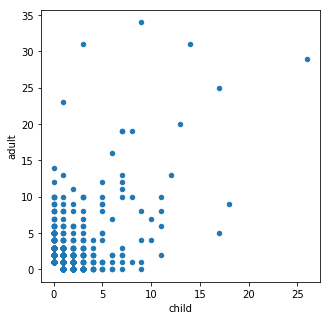

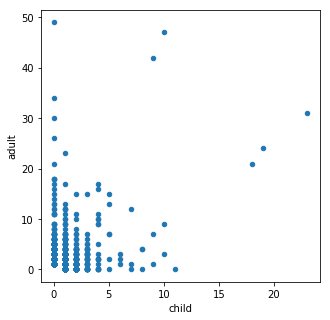

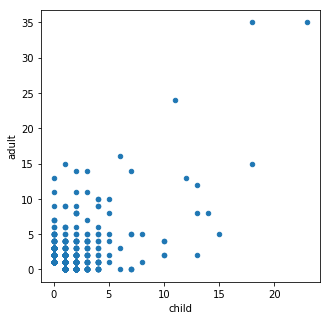

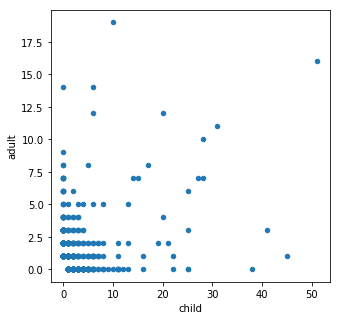

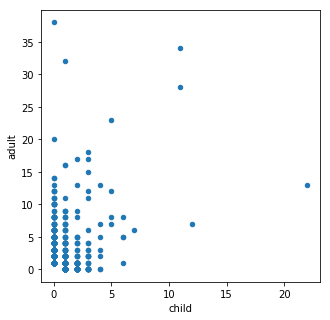

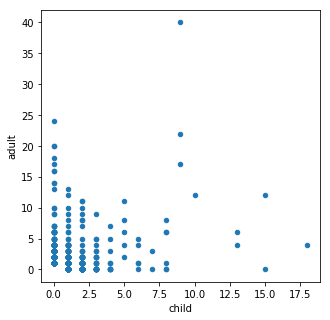

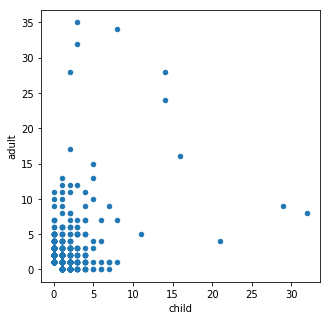

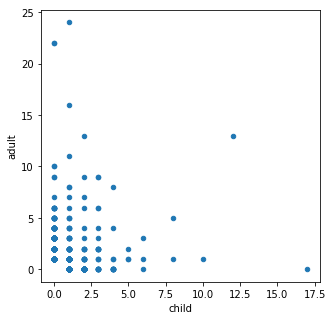

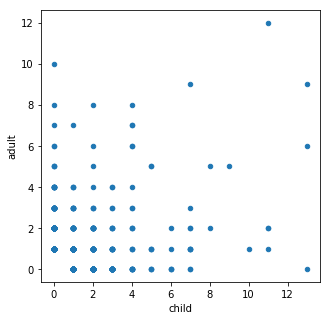

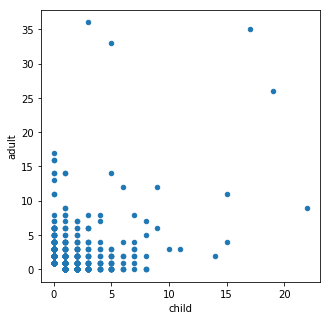

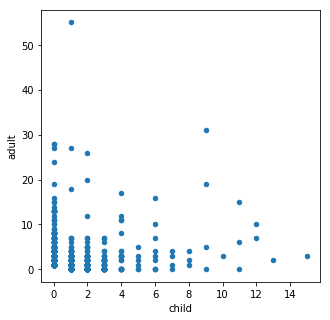

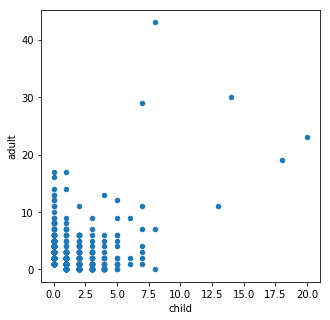

In [104]:
x = (
    bigrams
    [bigrams.session.eq(34)]
    .groupby(['corpus'])
    .apply(ngram_vecs)
)
axes = x.groupby(level='corpus').plot.scatter(x='child', y='adult')

# All trigram data in session 1

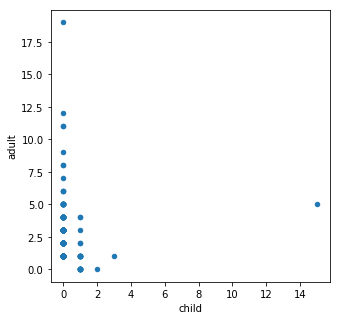

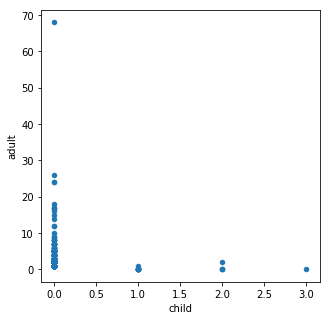

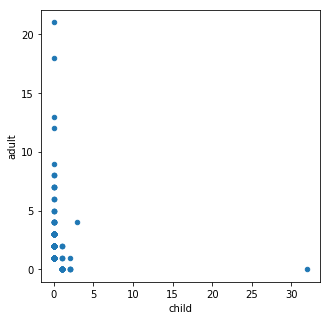

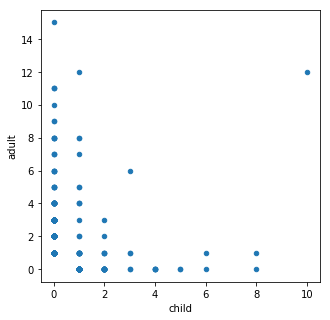

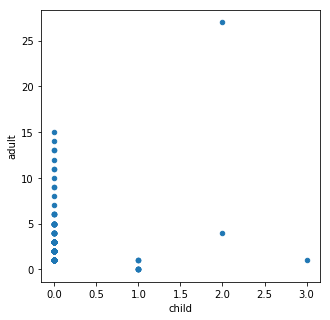

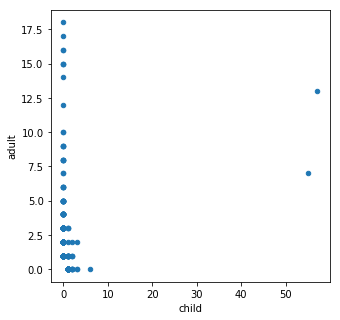

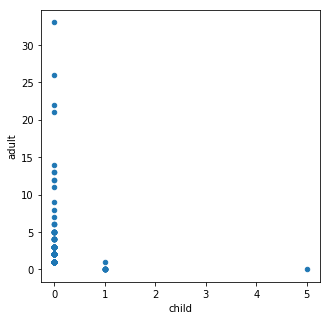

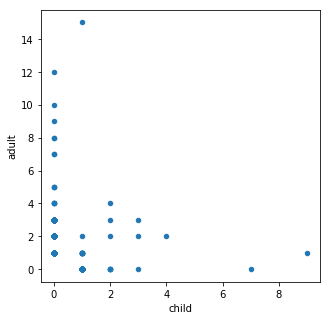

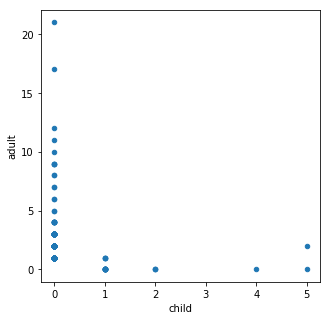

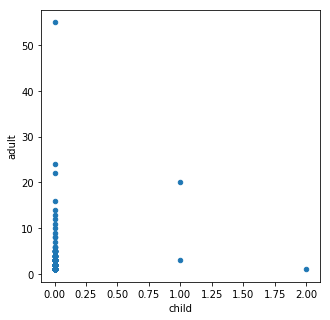

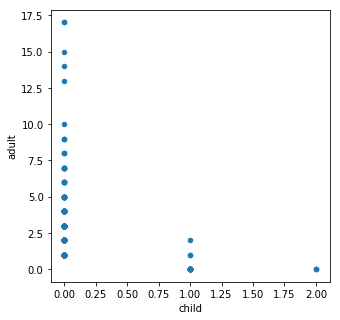

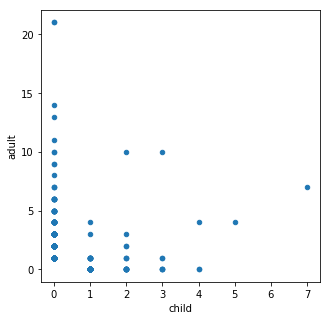

In [106]:
x = (
    trigrams
    [trigrams.session.eq(1)]
    .groupby(['corpus'])
    .apply(ngram_vecs)
)
axes = x.groupby(level='corpus').plot.scatter(x='child', y='adult')

# All trigram data in session 34

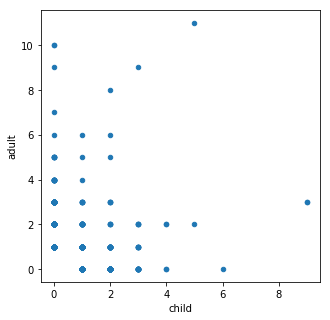

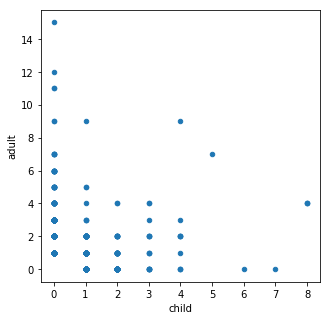

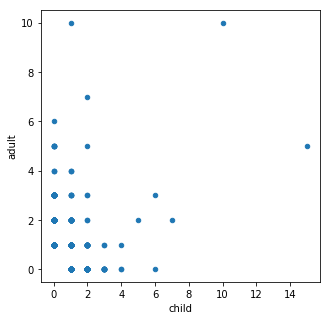

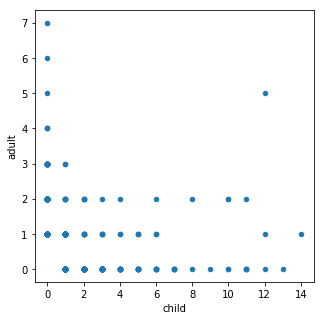

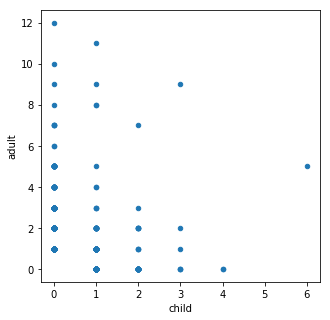

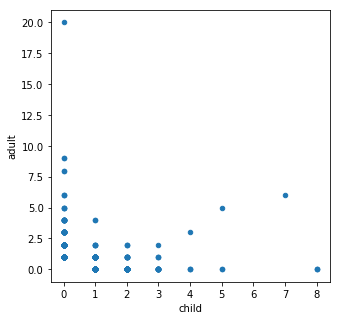

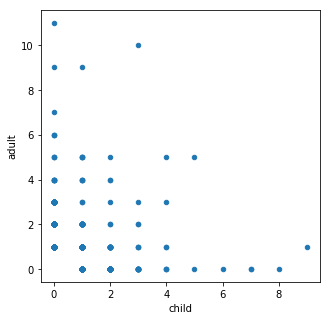

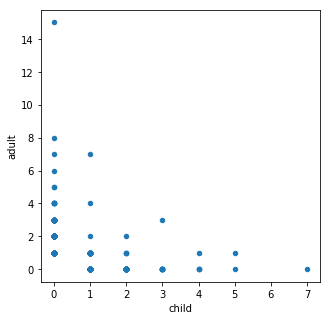

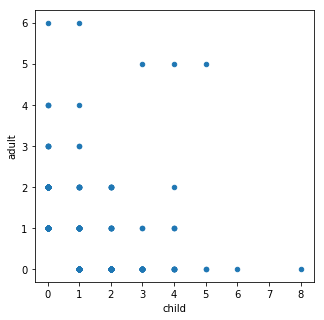

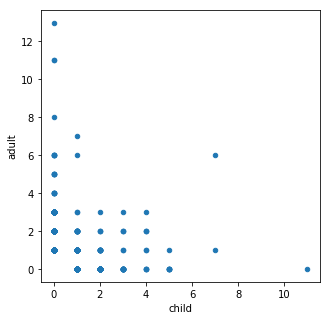

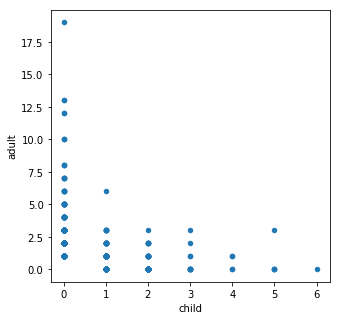

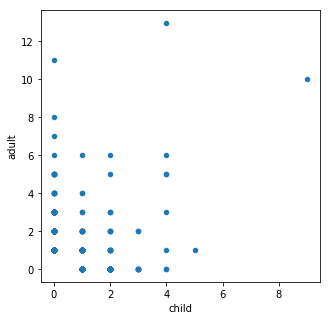

In [107]:
x = (
    trigrams
    [trigrams.session.eq(34)]
    .groupby(['corpus'])
    .apply(ngram_vecs)
)
axes = x.groupby(level='corpus').plot.scatter(x='child', y='adult')

In [ ]:
x = (
    bigrams[bigrams.speaker.isin(['CHI', 'MOT']) & unigrams.session.eq(34)]
    .groupby(['corpus'])
    .apply(ngram_vecs)
);

for corpus in x.index.levels[0]:
    d = x.loc[corpus]
    d.plot(kind='scatter', x='child', y='adult', title=corpus)
    reg = np.poly1d(np.polyfit(x=d.child, y=d.adult, deg=4))
    xp = np.linspace(0, 100)
    plt.plot(d.child, d.adult, '.', xp, reg(xp))

c = bigrams[bigrams.corpus.eq('anne') & bigrams.session.eq(34)]
{'morista': morisita_child_adult(c), 
 'spearman': spearman_child_adult(c), 
 'pearson': pearson_child_adult(c)}

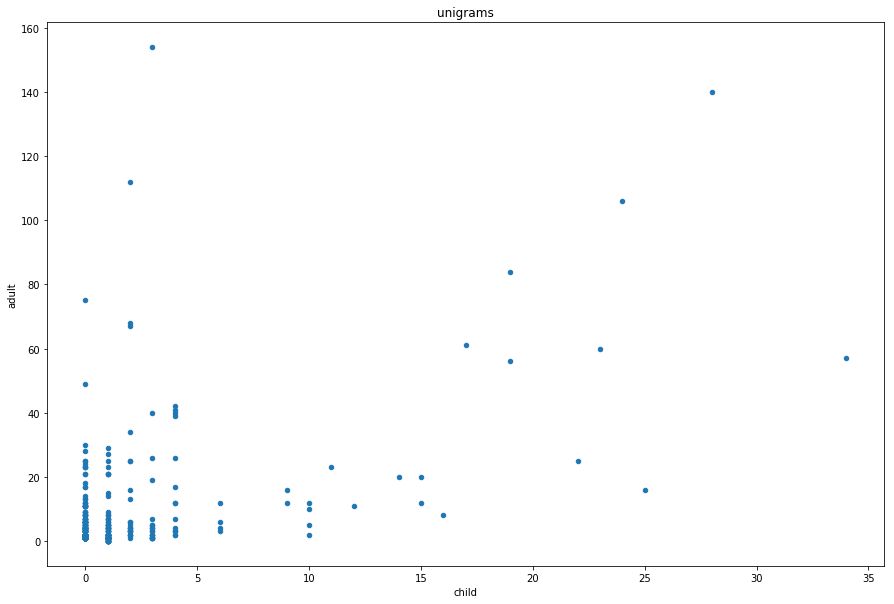

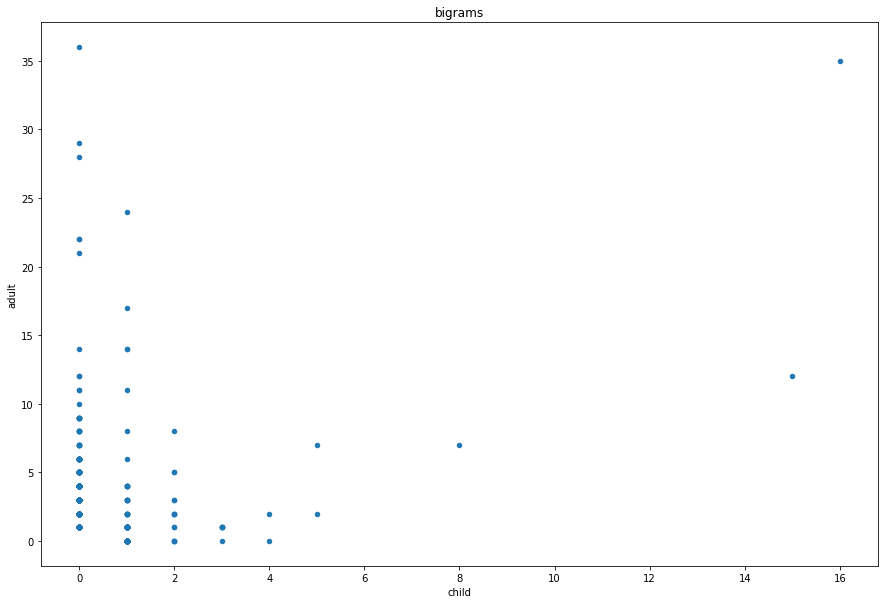

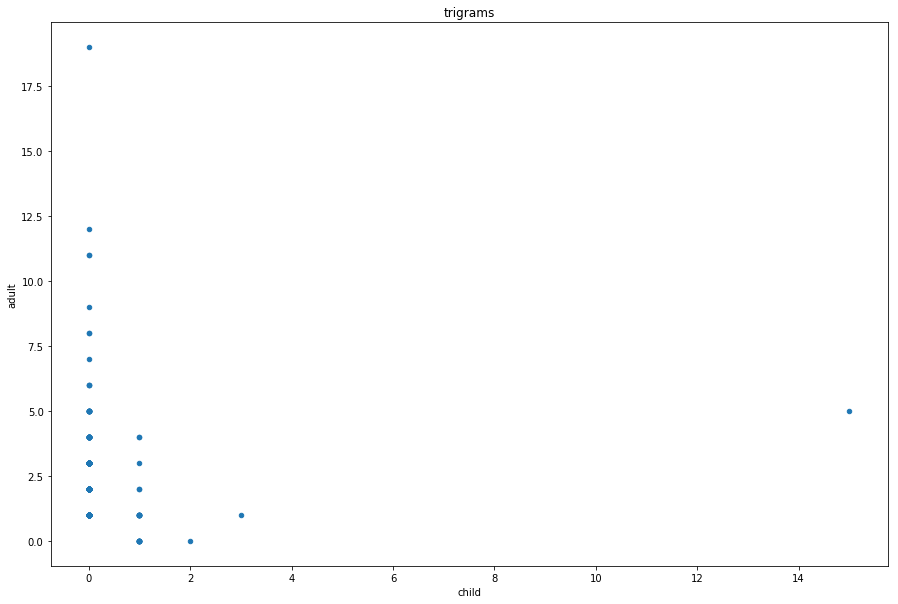

In [69]:

for df, label in zip((unigrams, bigrams, trigrams), 
                     ('unigrams', 'bigrams', 'trigrams')):
    df = df[df.session.eq(1) & df.corpus.eq('anne')]
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    pairs = pd.DataFrame({'child': a, 'adult': b})
    pairs.plot.scatter(x='child', y='adult', title=label);
#     x = np.poly1d(np.polyfit(x=pairs.adult, y=pairs.child, deg=2))
#     xp = np.linspace(-2, len(a.index), len(a.index))
#     plt.plot(pairs.adult, pairs.child, '.', xp, x(xp))

# Session 34

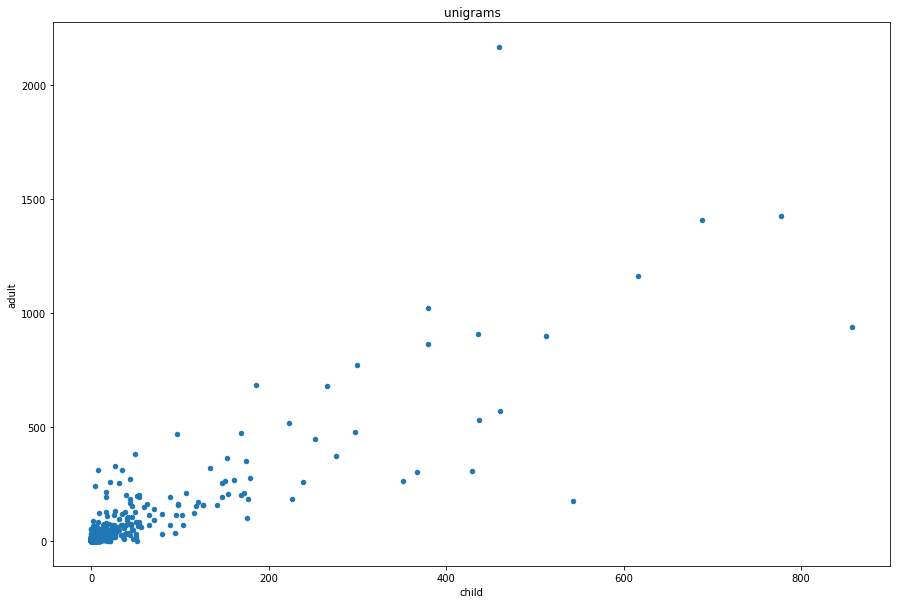

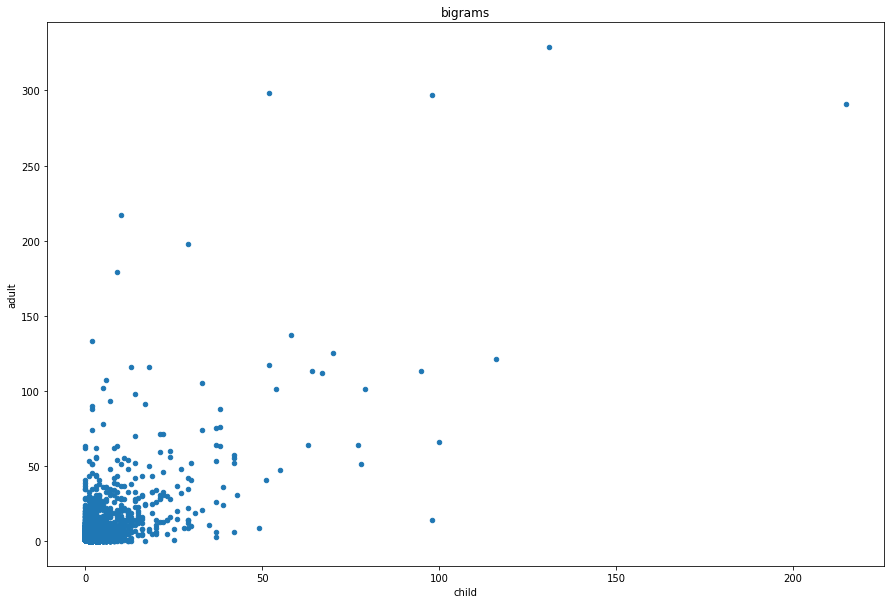

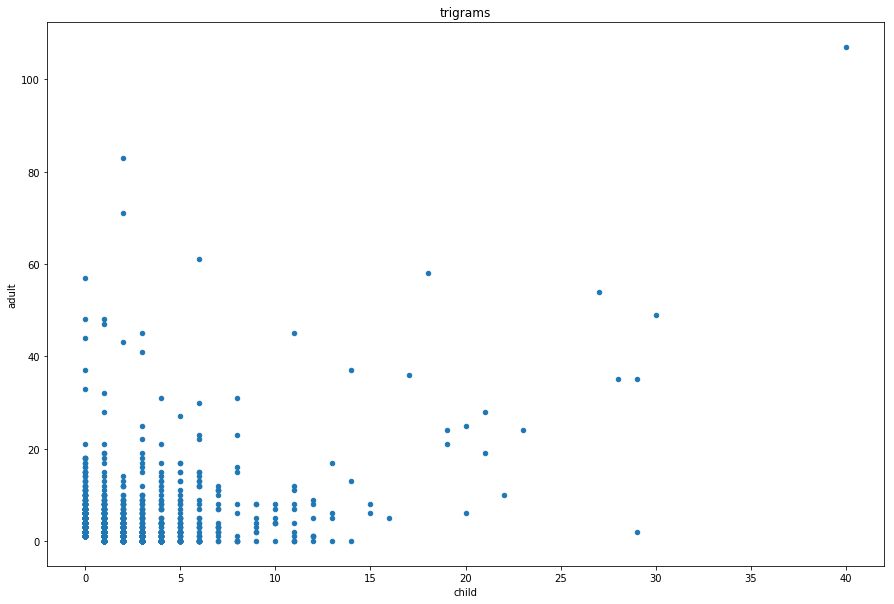

In [20]:
for df, label in zip((unigrams, bigrams, trigrams), 
                     ('unigrams', 'bigrams', 'trigrams')):
    df = df[df.session.eq(34)]
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    pairs = pd.DataFrame({'child': a, 'adult': b})
    pairs.plot.scatter(x='child', y='adult', title=label);

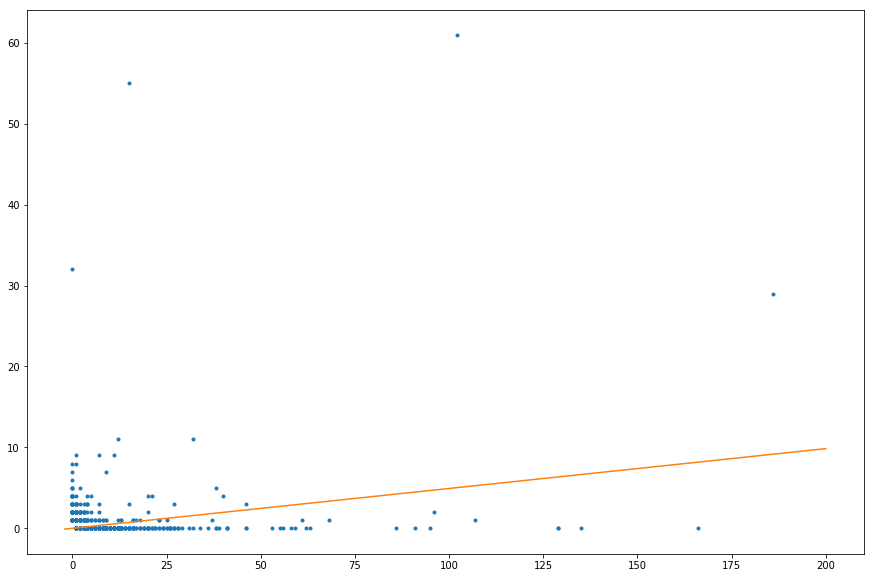